# Response time - Sentiment change
This notebook explores how the sentiment change depends on the reply time of airlines
### Imports

In [1]:
# IMPORTS
import sys
sys.path.append("../DBL-Data-Challenge")

# Own functions
from processes.reply4_2 import reply_set_up
from database.connect import getConnection

# Packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/alicialarsen/anaconda3/envs/ok/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
df_tweets = reply_set_up()
df_tweets.head()

,airline,reply_time,sentiment_change,sentiment1,sentiment2,canceling,boarding,stuck,booking,customers,dm,waiting,money,information,staff,baggage
0,AirFrance,0,None,-0.90000,0.20000,0,0,0,0,3,0,1,2,1,0,1
1,AirFrance,0,None,-0.90000,0.20000,0,0,0,0,4,0,1,1,1,0,1
2,AirFrance,0,None,-0.60000,-0.80000,0,0,0,9,6,1,0,0,3,0,9
3,AirFrance,0,None,0.20000,0.20000,0,0,0,0,3,0,1,2,1,0,1
4,AirFrance,1,None,-0.55000,-0.50000,0,0,0,1,0,3,0,0,2,0,4


In [3]:
# Convert sentiment score to pos, neu, neg

df_tweets.loc[df_tweets['sentiment1'] < -0.2, 'sentiment1'] = -1
df_tweets.loc[df_tweets['sentiment1'] > -0.2, 'sentiment1'] = 1
df_tweets.loc[(df_tweets['sentiment1']  >= -0.2) & (df_tweets['sentiment1'] <= 0.2), 'sentiment1'] = 0

df_tweets.loc[df_tweets['sentiment2'] < -0.2, 'sentiment2'] = -1
df_tweets.loc[df_tweets['sentiment2'] > -0.2, 'sentiment2'] = 1
df_tweets.loc[(df_tweets['sentiment2']  >= -0.2) & (df_tweets['sentiment2'] <= 0.2), 'sentiment2'] = 0

df_tweets.head()

,airline,reply_time,sentiment_change,sentiment1,sentiment2,canceling,boarding,stuck,booking,customers,dm,waiting,money,information,staff,baggage
0,AirFrance,0,None,-1,1,0,0,0,0,3,0,1,2,1,0,1
1,AirFrance,0,None,-1,1,0,0,0,0,4,0,1,1,1,0,1
2,AirFrance,0,None,-1,-1,0,0,0,9,6,1,0,0,3,0,9
3,AirFrance,0,None,1,1,0,0,0,0,3,0,1,2,1,0,1
4,AirFrance,1,None,-1,-1,0,0,0,1,0,3,0,0,2,0,4


In [4]:
# Calculate the difference between sentiment 1 and 2

df_tweets['sentiment_change'] = df_tweets['sentiment2'] - df_tweets['sentiment1']
df_tweets.head()

,airline,reply_time,sentiment_change,sentiment1,sentiment2,canceling,boarding,stuck,booking,customers,dm,waiting,money,information,staff,baggage
0,AirFrance,0,2,-1,1,0,0,0,0,3,0,1,2,1,0,1
1,AirFrance,0,2,-1,1,0,0,0,0,4,0,1,1,1,0,1
2,AirFrance,0,0,-1,-1,0,0,0,9,6,1,0,0,3,0,9
3,AirFrance,0,0,1,1,0,0,0,0,3,0,1,2,1,0,1
4,AirFrance,1,0,-1,-1,0,0,0,1,0,3,0,0,2,0,4


In [5]:
# Creating a data frame per topic
df_canceling = df_tweets[df_tweets['canceling'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_boarding = df_tweets[df_tweets['boarding'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_stuck = df_tweets[df_tweets['stuck'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_booking = df_tweets[df_tweets['booking'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_customers = df_tweets[df_tweets['customers'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_dm = df_tweets[df_tweets['dm'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_waiting = df_tweets[df_tweets['waiting'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_money = df_tweets[df_tweets['money'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_information = df_tweets[df_tweets['information'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_staff = df_tweets[df_tweets['staff'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_baggage = df_tweets[df_tweets['baggage'] != 0][['airline', 'reply_time', 'sentiment_change']]


# Binned of 1 min
df_canceling_gro = df_canceling[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_boarding_gro = df_boarding[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_stuck_gro = df_stuck[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_booking_gro = df_booking[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_customers_gro = df_customers[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_dm_gro = df_dm[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_waiting_gro = df_waiting[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_money_gro = df_money[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_information_gro = df_information[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_staff_gro = df_staff[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()
df_baggage_gro = df_baggage[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=15).mean()


In [6]:
# Checking the number ineach category

canceling_len = len(df_canceling.index)
boarding_len = len(df_boarding.index)
stuck_len = len(df_stuck.index)
booking_len = len(df_booking.index)
customers_len = len(df_customers.index)
dm_len = len(df_dm.index)
waiting_len = len(df_waiting.index)
money_len = len(df_money.index)
information_len = len(df_information.index)
staff_len = len(df_staff.index)
baggage_len = len(df_baggage.index)

print(f"""
      TOPIC COUNT
      canceling: {canceling_len}
      boarding: {boarding_len}
      stuck: {stuck_len}
      booking: {booking_len}
      customers: {customers_len}
      dm: {dm_len}
      waiting: {waiting_len}
      money: {money_len}
      information: {information_len}
      staff: {staff_len}
      baggage: {baggage_len}
      """)


      TOPIC COUNT
      canceling: 3379
      boarding: 5291
      stuck: 3047
      booking: 37152
      customers: 35777
      dm: 28427
      waiting: 32513
      money: 29894
      information: 27696
      staff: 17359
      baggage: 19124
      


In [7]:
baggage_qua5 = df_baggage['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])
boarding_qua5 = df_boarding['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])
booking_qua5 = df_booking['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])
information_qua5 = df_information['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])
money_qua5 = df_money['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])
waiting_qua5 = df_waiting['reply_time'].astype(float).quantile([0, 0.25, 0.5, 0.75, 1])


In [383]:
"""fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True, layout="constrained")

# ROW 1
# Canceling
sns.scatterplot(data=df_canceling, x='reply_time', y='sentiment_change', ax=ax[0,0])
ax[0,0].set_title('Canceling', size=16)
ax[0,0].set_xlabel('Response Time [hours]')
ax[0,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Boarding
sns.scatterplot(data=df_boarding, x='reply_time', y='sentiment_change', ax=ax[0,1])
ax[0,1].set_title('Boarding', size=16)
ax[0,1].set_xlabel('Response Time [hours]')

# Stuck
sns.scatterplot(data=df_stuck, x='reply_time', y='sentiment_change', ax=ax[0,2])
ax[0,2].set_title('Stuck', size=16)
ax[0,2].set_xlabel('Response Time [hours]')

# ROW 2
# Booking
sns.scatterplot(data=df_booking, x='reply_time', y='sentiment_change', alpha=0.005, ax=ax[1,0])
ax[1,0].set_title('Booking', size=16)
ax[1,0].set_xlabel('Response Time [hours]')
ax[1,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Customers
sns.scatterplot(data=df_customers, x='reply_time', y='sentiment_change', ax=ax[1,1])
ax[1,1].set_title('Customers', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# DM
sns.scatterplot(data=df_dm, x='reply_time', y='sentiment_change', ax=ax[1,2])
ax[1,2].set_title('DM', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# ROW 3
# Waiting
sns.scatterplot(data=df_waiting, x='reply_time', y='sentiment_change', ax=ax[2,0])
ax[2,0].set_title('Waiting', size=16)
ax[2,0].set_xlabel('Response Time [hours]')
ax[2,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Money
sns.scatterplot(data=df_money, x='reply_time', y='sentiment_change', ax=ax[2,1])
ax[2,1].set_title('Money', size=16)
ax[2,1].set_xlabel('Response Time [hours]')

# Baggage
sns.scatterplot(data=df_baggage, x='reply_time', y='sentiment_change', ax=ax[2,2])
ax[2,2].set_title('Baggage', size=16)
ax[2,2].set_xlabel('Response Time [hours]')

# ROW 4
# Information
sns.scatterplot(data=df_information, x='reply_time', y='sentiment_change', ax=ax[3,0])
ax[3,0].set_title('Information', size=16)
ax[3,0].set_xlabel('Response Time [hours]')
ax[3,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Staff
sns.scatterplot(data=df_staff, x='reply_time', y='sentiment_change', ax=ax[3,1])
ax[3,1].set_title('Staff', size=16)
ax[3,1].set_xlabel('Response Time [hours]')


fig.suptitle('Sentiment Change Over Airline Reply Time Per Topic', weight='bold', size=20)"""

'fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True, layout="constrained")\n\n# ROW 1\n# Canceling\nsns.scatterplot(data=df_canceling, x=\'reply_time\', y=\'sentiment_change\', ax=ax[0,0])\nax[0,0].set_title(\'Canceling\', size=16)\nax[0,0].set_xlabel(\'Response Time [hours]\')\nax[0,0].set_ylabel(\'Sentiment Change [XLM-RoBERTA]\')\n\n\n# Boarding\nsns.scatterplot(data=df_boarding, x=\'reply_time\', y=\'sentiment_change\', ax=ax[0,1])\nax[0,1].set_title(\'Boarding\', size=16)\nax[0,1].set_xlabel(\'Response Time [hours]\')\n\n# Stuck\nsns.scatterplot(data=df_stuck, x=\'reply_time\', y=\'sentiment_change\', ax=ax[0,2])\nax[0,2].set_title(\'Stuck\', size=16)\nax[0,2].set_xlabel(\'Response Time [hours]\')\n\n# ROW 2\n# Booking\nsns.scatterplot(data=df_booking, x=\'reply_time\', y=\'sentiment_change\', alpha=0.005, ax=ax[1,0])\nax[1,0].set_title(\'Booking\', size=16)\nax[1,0].set_xlabel(\'Response Time [hours]\')\nax[1,0].set_ylabel(\'Sentiment Change [XLM-RoBERTA]\')\n\

In [8]:
# The data frames to make significance testing on
df_baggage = df_baggage[['reply_time', 'sentiment_change']]
df_boarding = df_boarding[['reply_time', 'sentiment_change']]
df_booking = df_booking[['reply_time', 'sentiment_change']]
df_information = df_information[['reply_time', 'sentiment_change']]
df_money = df_money[['reply_time', 'sentiment_change']]
df_waiting = df_waiting[['reply_time', 'sentiment_change']]

df_baggage.head()

,reply_time,sentiment_change
0,0,2
1,0,2
2,0,0
3,0,0
4,1,0


In [9]:
# Function that splits the data
def split_df(df, df_qua):
    "Takes a dataframe and splits it into 5 quantiles"
    df = df[['reply_time', 'sentiment_change']].astype(float)
    df25 = df[(df['reply_time'] >= df_qua[0.0]) & (df['reply_time'] < df_qua[0.25])]
    df50 = df[(df['reply_time'] >= df_qua[0.25]) & (df['reply_time'] < df_qua[0.5])]
    df75 = df[(df['reply_time'] >= df_qua[0.5]) & (df['reply_time'] < df_qua[0.75])]
    df90 = df[(df['reply_time'] >= df_qua[0.75])]

    return df25, df50, df75, df90

In [10]:
# Data frames
df_baggage_4 = split_df(df_baggage, baggage_qua5)
df_boarding_4 = split_df(df_boarding, boarding_qua5)
df_booking_4 = split_df(df_booking, booking_qua5)
df_information_4 = split_df(df_information, information_qua5)
df_money_4 = split_df(df_money, money_qua5)
df_waiting_4 = split_df(df_waiting, waiting_qua5)

In [11]:
from scipy.stats import ttest_ind

def welch_test(tuple_df, topic):
    """"
    Takes two lists and calculates their p-values
    """
    qua = 25
    p_values_dict = {}
    p_values_dict['topic'] = topic
    for i in range(0, len(tuple_df)-1):
        t, p = ttest_ind(tuple_df[i]['sentiment_change'], tuple_df[i+1]['sentiment_change'], equal_var=False, alternative='less')
        p_values_dict[f'{qua} vs. {qua + 25}'] = p
        qua += 25
    df_lo = pd.concat([tuple_df[0], tuple_df[1]], ignore_index=True, sort=False)
    df_hi = pd.concat([tuple_df[2], tuple_df[3]], ignore_index=True, sort=False)

    t, p = ttest_ind(df_lo['sentiment_change'], df_hi['sentiment_change'], equal_var=False, alternative='less')
    p_values_dict[f'low vs high'] = p
    
    return p_values_dict

In [12]:
p_baggage = welch_test(df_baggage_4, 'baggage')
p_boarding = welch_test(df_boarding_4, 'boarding')
p_booking = welch_test(df_booking_4, 'booking')
p_information = welch_test(df_information_4, 'information')
p_money = welch_test(df_money_4, 'money')
p_waiting = welch_test(df_waiting_4, 'waiting')

ds = [p_baggage, p_boarding, p_booking, p_information, p_money, p_waiting]

df_p = pd.DataFrame(ds)
df_p


,topic,25 vs. 50,50 vs. 75,75 vs. 100,low vs high
0,baggage,0.019331,0.642138,0.644479,0.277580
1,boarding,0.147583,0.078321,0.949495,0.069822
2,booking,0.091127,0.321984,0.081497,0.006050
3,information,0.049546,0.519686,0.248047,0.072344
4,money,0.081961,0.484752,0.057966,0.018762
5,waiting,0.015251,0.922800,0.195452,0.458432


Text(0.5, 1.07, 'Sentiment Change over Airline Reply-Time in Conversations, Per Topic')

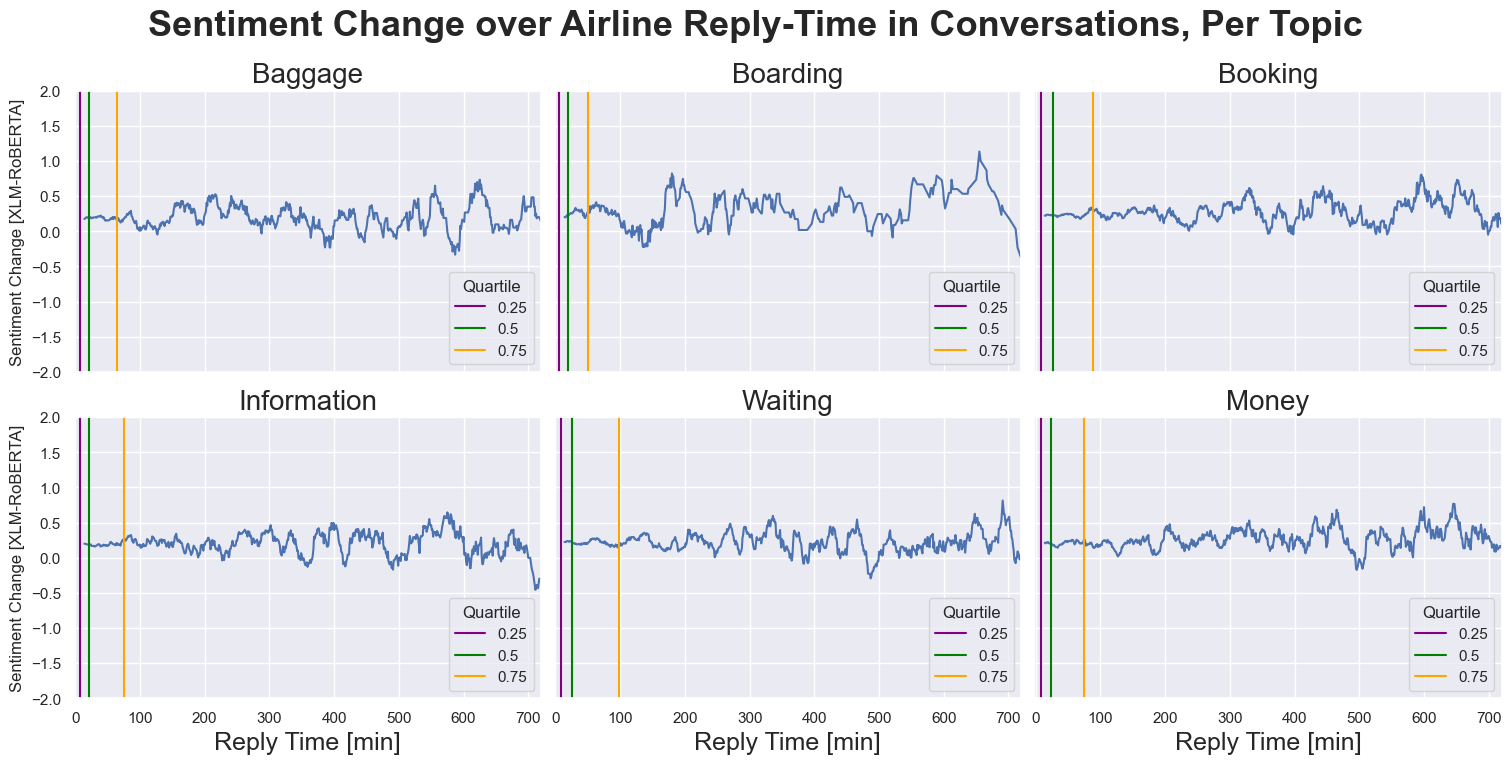

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,7), sharey=True, sharex=True, layout="constrained")
plt.setp(ax, ylim=(-2,2))
plt.setp(ax, xlim=(-2,720))


# ROW 1
# Baggage
sns.lineplot(data=df_baggage_gro, x='reply_time', y='sentiment_change', ax=ax[0,0])
ax[0,0].axvline(x = baggage_qua5[0.25], c='purple', label='0.25')
ax[0,0].axvline(x = baggage_qua5[0.5], c='green', label='0.5')
ax[0,0].axvline(x = baggage_qua5[0.75], c='orange', label='0.75')
ax[0,0].legend(title = 'Quartile')
ax[0,0].set_title('Baggage', size=20)
ax[0,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Boarding
sns.lineplot(data=df_boarding_gro, x='reply_time', y='sentiment_change', ax=ax[0,1])
ax[0,1].axvline(x = boarding_qua5[0.25], c='purple', label='0.25')
ax[0,1].axvline(x = boarding_qua5[0.5], c='green', label='0.5')
ax[0,1].axvline(x = boarding_qua5[0.75], c='orange', label='0.75')
ax[0,1].legend(title = 'Quartile')
ax[0,1].set_title('Boarding', size=20)

# Booking
sns.lineplot(data=df_booking_gro, x='reply_time', y='sentiment_change', ax=ax[0,2])
ax[0,2].axvline(x = booking_qua5[0.25], c='purple', label='0.25')
ax[0,2].axvline(x = booking_qua5[0.5], c='green', label='0.5')
ax[0,2].axvline(x = booking_qua5[0.75], c='orange', label='0.75')
ax[0,2].legend(title = 'Quartile')
ax[0,2].set_title('Booking', size=20)

# ROW 2
# Information
sns.lineplot(data=df_information_gro, x='reply_time', y='sentiment_change', ax=ax[1,0])
ax[1,0].axvline(x = information_qua5[0.25], c='purple', label='0.25')
ax[1,0].axvline(x = information_qua5[0.5], c='green', label='0.5')
ax[1,0].axvline(x = information_qua5[0.75], c='orange', label='0.75')
ax[1,0].legend(title = 'Quartile')
ax[1,0].set_title('Information', size=20)
ax[1,0].set_xlabel('Reply Time [min]', size=18)
ax[1,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Waiting
sns.lineplot(data=df_waiting_gro, x='reply_time', y='sentiment_change', ax=ax[1,1])
ax[1,1].axvline(x = money_qua5[0.25], c='purple', label='0.25')
ax[1,1].axvline(x = money_qua5[0.5], c='green', label='0.5')
ax[1,1].axvline(x = money_qua5[0.75], c='orange', label='0.75')
ax[1,1].legend(title = 'Quartile')
ax[1,1].set_xlabel('Reply Time [min]', size=18)
ax[1,1].set_title('Waiting', size=20)

# Money
sns.lineplot(data=df_money_gro, x='reply_time', y='sentiment_change', ax=ax[1,2])
ax[1,2].axvline(x = waiting_qua5[0.25], c='purple', label='0.25')
ax[1,2].axvline(x = waiting_qua5[0.5], c='green', label='0.5')
ax[1,2].axvline(x = waiting_qua5[0.75], c='orange', label='0.75')
ax[1,2].legend(title = 'Quartile')
ax[1,2].set_title('Money', size=20)
ax[1,2].set_xlabel('Reply Time [min]', size=18)

fig.suptitle('Sentiment Change over Airline Reply-Time in Conversations, Per Topic', weight='bold', size=26, y=1.07)